In [1]:
import pandas as pd

### Importando a Base

In [2]:
base = pd.read_csv(R"Hotel Reservations.csv")
base = pd.DataFrame(base)
base.head()

# Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


# DATA CLEANING

### 1. Renomeando as colunas

In [3]:
base.columns = ['Reserva_ID', 'n_adultos', 'n_filhos', 'n_noites_fim_de_semana',
       'n_noites_de_semana', 'tipo_plano', 'estacionamento',
       'tipo_quarto', 'dias_entre_reserva_chegada', 'ano_chegada', 'mes_chegada',
       'dia_chegada', 'segmento_mercado', 'convidado_repetido',
       'cancelamentos_anteriores', 'nao_cancelamentos_anteriores',
       'media_preco_reserva', 'solicitacoes_especiais', 'reserva_status']

base.head(2)

,Reserva_ID,n_adultos,n_filhos,n_noites_fim_de_semana,n_noites_de_semana,tipo_plano,estacionamento,tipo_quarto,dias_entre_reserva_chegada,ano_chegada,mes_chegada,dia_chegada,segmento_mercado,convidado_repetido,cancelamentos_anteriores,nao_cancelamentos_anteriores,media_preco_reserva,solicitacoes_especiais,reserva_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled


### 2. Traduzir os valores Categoricos

In [4]:
base['tipo_plano'] = base['tipo_plano'].map({'Meal Plan 1': 'Plano_de_refeicao 1', 'Meal Plan 2': 'Plano_de_refeicao 2',
                                             'Meal Plan 3': 'Plano_de_refeicao 3', 'Not Selected': 'Nao_selecionado'})

base['tipo_plano'].unique()

array(['Plano_de_refeicao 1', 'Nao_selecionado', 'Plano_de_refeicao 2',
       'Plano_de_refeicao 3'], dtype=object)

In [5]:
base['tipo_quarto'] = base['tipo_quarto'].map({'Room_Type 1': 'Quarto_1', 'Room_Type 2': 'Quarto_2',
                                               'Room_Type 3': 'Quarto_3', 'Room_Type 4': 'Quarto_4',
                                               'Room_Type 5': 'Quarto_5', 'Room_Type 6': 'Quarto_6',
                                               'Room_Type 7': 'Quarto_7'})

base['tipo_quarto'].unique()

array(['Quarto_1', 'Quarto_4', 'Quarto_2', 'Quarto_6', 'Quarto_5',
       'Quarto_7', 'Quarto_3'], dtype=object)

In [6]:
base['reserva_status'] = base['reserva_status'].map({'Not_Canceled': 'Nao_cancelado', 'Canceled': 'Cancelado'})
base['reserva_status'].unique()

array(['Nao_cancelado', 'Cancelado'], dtype=object)

### 3. Mesclando colunas de dia, mes e ano, criando uma coluna de data

In [7]:
base['data_chegada'] = base['dia_chegada'].map(str) + '-' + base['mes_chegada'].map(str) + '-' + base['ano_chegada'].map(str)
base['data_chegada']

0         2-10-2017
1         6-11-2018
2         28-2-2018
3         20-5-2018
4         11-4-2018
            ...    
36270      3-8-2018
36271    17-10-2018
36272      1-7-2018
36273     21-4-2018
36274    30-12-2018
Name: data_chegada, Length: 36275, dtype: object

### 4. CORRIGINDO O INPUT DE DADOS INCORRETOS, POIS ALGUMAS DATAS FICARAM INVALIDADAS POR NÃO EXISTIREM

In [8]:
#base['data_chegada'] = base['data_chegada'].map({'29-2-2018': '28-2-2018'})
base['data_chegada'].replace('29-2-2018', '28-2-2018', inplace=True)
base.head(2)

,Reserva_ID,n_adultos,n_filhos,n_noites_fim_de_semana,n_noites_de_semana,tipo_plano,estacionamento,tipo_quarto,dias_entre_reserva_chegada,ano_chegada,mes_chegada,dia_chegada,segmento_mercado,convidado_repetido,cancelamentos_anteriores,nao_cancelamentos_anteriores,media_preco_reserva,solicitacoes_especiais,reserva_status,data_chegada
0,INN00001,2,0,1,2,Plano_de_refeicao 1,0,Quarto_1,224,2017,10,2,Offline,0,0,0,65.00,0,Nao_cancelado,2-10-2017
1,INN00002,2,0,2,3,Nao_selecionado,0,Quarto_1,5,2018,11,6,Online,0,0,0,106.68,1,Nao_cancelado,6-11-2018


### 5. TRANSFORMANDO A COLUNA data_chegada EM DATETIME

In [9]:
base['data_chegada'] = pd.to_datetime(base['data_chegada'])
base.head(2)

C:\Users\Dell\AppData\Local\Temp\ipykernel_15748\827387982.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  base['data_chegada'] = pd.to_datetime(base['data_chegada'])


,Reserva_ID,n_adultos,n_filhos,n_noites_fim_de_semana,n_noites_de_semana,tipo_plano,estacionamento,tipo_quarto,dias_entre_reserva_chegada,ano_chegada,mes_chegada,dia_chegada,segmento_mercado,convidado_repetido,cancelamentos_anteriores,nao_cancelamentos_anteriores,media_preco_reserva,solicitacoes_especiais,reserva_status,data_chegada
0,INN00001,2,0,1,2,Plano_de_refeicao 1,0,Quarto_1,224,2017,10,2,Offline,0,0,0,65.00,0,Nao_cancelado,2017-02-10
1,INN00002,2,0,2,3,Nao_selecionado,0,Quarto_1,5,2018,11,6,Online,0,0,0,106.68,1,Nao_cancelado,2018-06-11


### 6. EXCLUINDO AS ANTIGAS COLUNAS DE DIA, MES E ANO

In [10]:
##lista com as colunas, o axis define que é coluna e o inplace aplica realmente a base
base.drop(['ano_chegada', 'mes_chegada', 'dia_chegada'], axis='columns', inplace=True)
base.columns

Index(['Reserva_ID', 'n_adultos', 'n_filhos', 'n_noites_fim_de_semana',
       'n_noites_de_semana', 'tipo_plano', 'estacionamento', 'tipo_quarto',
       'dias_entre_reserva_chegada', 'segmento_mercado', 'convidado_repetido',
       'cancelamentos_anteriores', 'nao_cancelamentos_anteriores',
       'media_preco_reserva', 'solicitacoes_especiais', 'reserva_status',
       'data_chegada'],
      dtype='object')

### 7. Criar uma coluna de data de reserva

In [11]:
base['data_reserva'] = base['data_chegada'] - pd.to_timedelta(base['dias_entre_reserva_chegada'], unit='d')
base.drop(['dias_entre_reserva_chegada'], axis='columns', inplace=True)
base.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Reserva_ID                    36275 non-null  object        
 1   n_adultos                     36275 non-null  int64         
 2   n_filhos                      36275 non-null  int64         
 3   n_noites_fim_de_semana        36275 non-null  int64         
 4   n_noites_de_semana            36275 non-null  int64         
 5   tipo_plano                    36275 non-null  object        
 6   estacionamento                36275 non-null  int64         
 7   tipo_quarto                   36275 non-null  object        
 8   segmento_mercado              36275 non-null  object        
 9   convidado_repetido            36275 non-null  int64         
 10  cancelamentos_anteriores      36275 non-null  int64         
 11  nao_cancelamentos_anteriores

### 8. CRIAR COLUNA CATEGORIGA ESPECIFICANDO SE O CLIENTE JÁ CANCELOU ANTES OU NÃO

In [12]:
def ja_cancelou_(n_cancelamentos_anteriores):
    if int(n_cancelamentos_anteriores) > 0:
        return 'sim'
    else: return 'nao'


base['ja_cancelou_antes'] = base['cancelamentos_anteriores'].apply(ja_cancelou_)
base['ja_cancelou_antes'] 

0        nao
1        nao
2        nao
3        nao
4        nao
        ... 
36270    nao
36271    nao
36272    nao
36273    nao
36274    nao
Name: ja_cancelou_antes, Length: 36275, dtype: object

### 9. Verificando OUTLIER com boxplot

AxesSubplot(0.125,0.11;0.775x0.77)


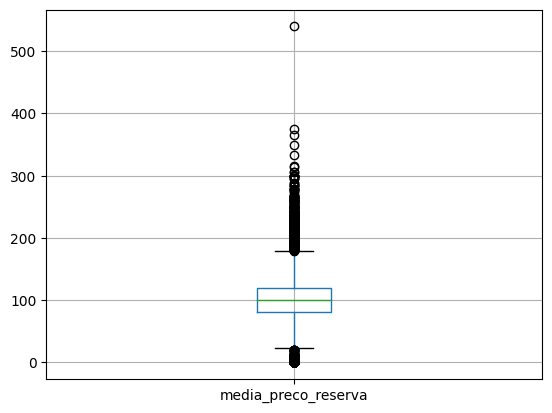

In [13]:
#podemos ver que existem reservas a 0 reias, o que pode ter sido algum tipo de promoção. Mas tb temos uma bem fora do comum
#que custou mais que 500 reais... nesse caso apenas alguém com conhecimento sobre a base saberia dizer a razão e o que
#deveriamos fazer com esse dado
print(base.boxplot(column=['media_preco_reserva']))

### 10. Verificando Duplicados

In [14]:
base['Reserva_ID'].duplicated().sum()

0

# BASE LIMPA E PRONTA PARA ANÁLISE

In [15]:
base.head(15)

,Reserva_ID,n_adultos,n_filhos,n_noites_fim_de_semana,n_noites_de_semana,tipo_plano,estacionamento,tipo_quarto,segmento_mercado,convidado_repetido,cancelamentos_anteriores,nao_cancelamentos_anteriores,media_preco_reserva,solicitacoes_especiais,reserva_status,data_chegada,data_reserva,ja_cancelou_antes
0,INN00001,2,0,1,2,Plano_de_refeicao 1,0,Quarto_1,Offline,0,0,0,65.00,0,Nao_cancelado,2017-02-10,2016-07-01,nao
1,INN00002,2,0,2,3,Nao_selecionado,0,Quarto_1,Online,0,0,0,106.68,1,Nao_cancelado,2018-06-11,2018-06-06,nao
2,INN00003,1,0,2,1,Plano_de_refeicao 1,0,Quarto_1,Online,0,0,0,60.00,0,Cancelado,2018-02-28,2018-02-27,nao
3,INN00004,2,0,0,2,Plano_de_refeicao 1,0,Quarto_1,Online,0,0,0,100.00,0,Cancelado,2018-05-20,2017-10-21,nao
4,INN00005,2,0,1,1,Nao_selecionado,0,Quarto_1,Online,0,0,0,94.50,0,Cancelado,2018-11-04,2018-09-17,nao
5,INN00006,2,0,0,2,Plano_de_refeicao 2,0,Quarto_1,Online,0,0,0,115.00,1,Cancelado,2018-09-13,2017-10-02,nao
6,INN00007,2,0,1,3,Plano_de_refeicao 1,0,Quarto_1,Online,0,0,0,107.55,1,Nao_cancelado,2017-10-15,2017-09-11,nao
7,INN00008,2,0,1,3,Plano_de_refeicao 1,0,Quarto_4,Online,0,0,0,105.61,1,Nao_cancelado,2018-12-26,2018-10-04,nao
8,INN00009,3,0,0,4,Plano_de_refeicao 1,0,Quarto_1,Offline,0,0,0,96.90,1,Nao_cancelado,2018-06-07,2018-02-06,nao
9,INN00010,2,0,0,5,Plano_de_refeicao 1,0,Quarto_4,Online,0,0,0,133.44,3,Nao_cancelado,2018-10-18,2018-09-04,nao
